# Laboratorio 02

- Moreno Taboada Matias Edwin
- Sanchez Tinco Robert Anthony

In [1]:
!pip install pycaret


In [2]:
import pandas as pd
import numpy as np
from pycaret.classification import *


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [9]:
# Contar valores 0 por columna
zero_percentage = (df == 0).sum() / len(df) * 100
zero_percentage


,0
Pregnancies,14.453125
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,65.104167


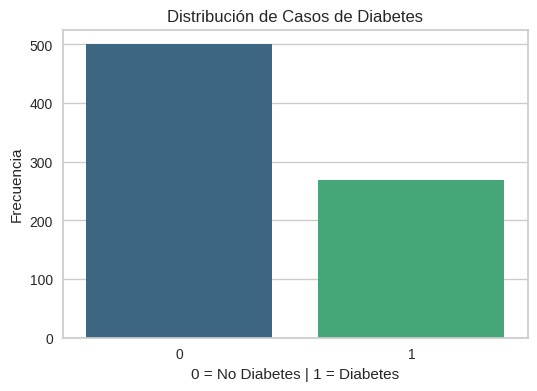

In [10]:
# 1️⃣ Distribución de la variable objetivo (Outcome)
plt.figure(figsize=(6,4))
sns.countplot(x=df["Outcome"], palette="viridis")
plt.title("Distribución de Casos de Diabetes")
plt.xlabel("0 = No Diabetes | 1 = Diabetes")
plt.ylabel("Frecuencia")
plt.show()


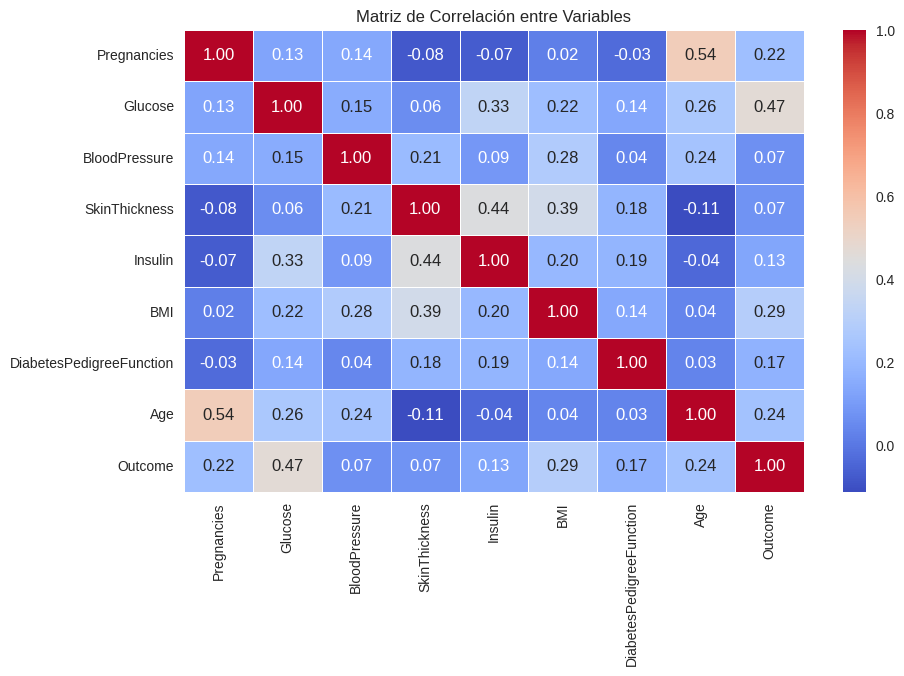

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()


<Figure size 1200x800 with 0 Axes>

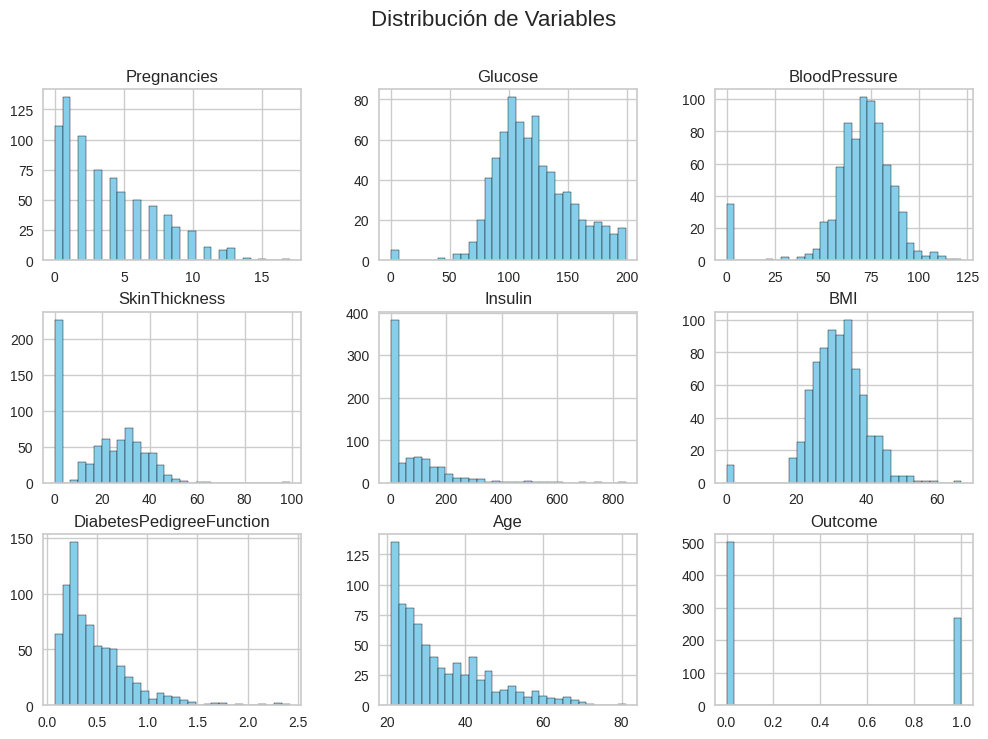

In [13]:
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Distribución de Variables", fontsize=16)
plt.show()

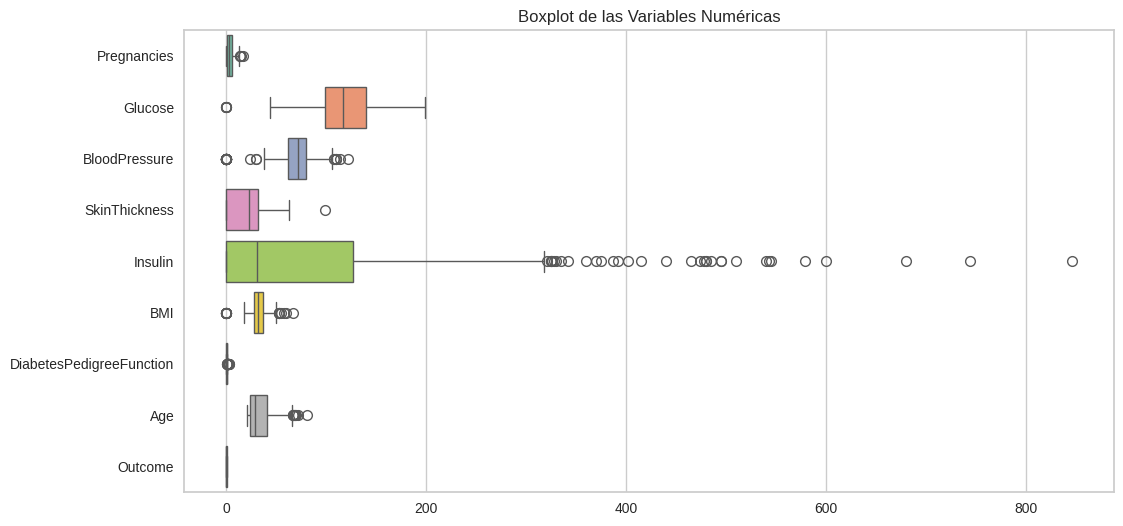

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot de las Variables Numéricas")
plt.show()

In [8]:
#cols_with_zeros = ["SkinThickness", "Insulin", "Pregnancies"]


#for col in cols_with_zeros:
#    df[col] = df[col].replace(0, np.nan)
#    df[col].fillna(df[col].median(), inplace=True)

## PYCARET

In [16]:
clf = setup(data=df, target="Outcome", session_id=42, train_size=0.8, normalize=True, remove_outliers=True)


,Description,Value
0,Session id,42
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(737, 9)"
5,Transformed train set shape,"(583, 9)"
6,Transformed test set shape,"(154, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [17]:
mejor_modelo = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7787,0.8356,0.5755,0.7391,0.6432,0.4871,0.4975,1.0380
lda,Linear Discriminant Analysis,0.7787,0.8359,0.5660,0.7439,0.6387,0.4843,0.4961,0.2230
ridge,Ridge Classifier,0.7786,0.8362,0.5613,0.7467,0.6368,0.4830,0.4956,0.1710
rf,Random Forest Classifier,0.7737,0.8297,0.5978,0.7167,0.6459,0.4824,0.4909,0.4940
nb,Naive Bayes,0.7638,0.8293,0.6487,0.6671,0.6543,0.4755,0.4787,0.2380
ada,Ada Boost Classifier,0.7608,0.7986,0.5812,0.6893,0.6260,0.4533,0.4601,0.2600
et,Extra Trees Classifier,0.7574,0.8247,0.5465,0.6981,0.6048,0.4360,0.4470,0.3810
qda,Quadratic Discriminant Analysis,0.7526,0.8239,0.6307,0.6516,0.6394,0.4513,0.4528,0.1710
gbc,Gradient Boosting Classifier,0.7379,0.8150,0.5418,0.6600,0.5887,0.3999,0.4085,0.3130
lightgbm,Light Gradient Boosting Machine,0.7330,0.7945,0.5565,0.6455,0.5883,0.3941,0.4025,0.3470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
modelo_final = create_model(mejor_modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7097,0.7909,0.5000,0.6111,0.5500,0.3389,0.3426
1,0.7581,0.8170,0.6364,0.6667,0.6512,0.4661,0.4664
2,0.7742,0.8159,0.5909,0.7222,0.6500,0.4858,0.4911
3,0.7419,0.8455,0.4091,0.7500,0.5294,0.3722,0.4046
4,0.7869,0.7893,0.6190,0.7222,0.6667,0.5114,0.5147
5,0.7705,0.7988,0.6190,0.6842,0.6500,0.4799,0.4812
6,0.8033,0.8417,0.5238,0.8462,0.6471,0.5209,0.5497
7,0.8033,0.8952,0.5714,0.8000,0.6667,0.5326,0.5477
8,0.8689,0.8952,0.7143,0.8824,0.7895,0.6958,0.7040


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
modelo_tuned = tune_model(modelo_final)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7258,0.7909,0.5455,0.6316,0.5854,0.3822,0.3845
1,0.7581,0.8182,0.6364,0.6667,0.6512,0.4661,0.4664
2,0.7742,0.8159,0.5909,0.7222,0.6500,0.4858,0.4911
3,0.7419,0.8455,0.4091,0.7500,0.5294,0.3722,0.4046
4,0.7869,0.7881,0.6190,0.7222,0.6667,0.5114,0.5147
5,0.7705,0.7976,0.6190,0.6842,0.6500,0.4799,0.4812
6,0.8033,0.8405,0.5238,0.8462,0.6471,0.5209,0.5497
7,0.8033,0.8940,0.5714,0.8000,0.6667,0.5326,0.5477
8,0.8689,0.8940,0.7143,0.8824,0.7895,0.6958,0.7040


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


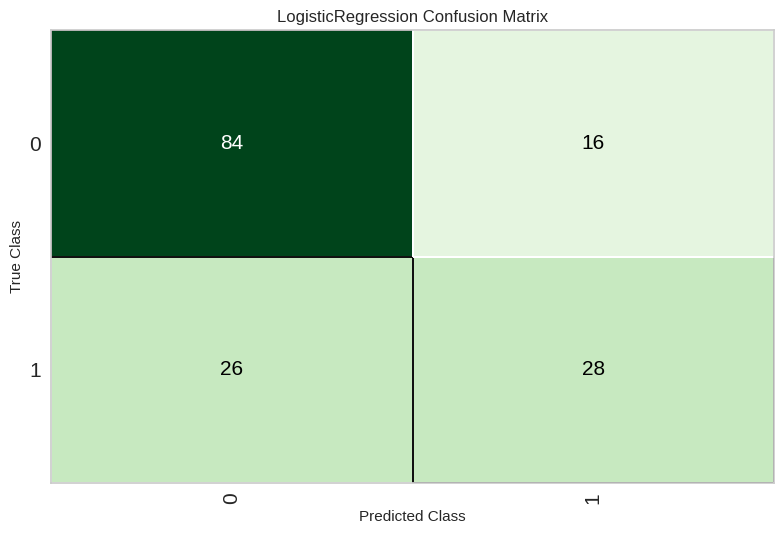

In [20]:
plot_model(modelo_tuned, plot='confusion_matrix')


In [21]:
evaluate_model(modelo_tuned)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
save_model(modelo_tuned, 'modelo_diabetes')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 (...
          